<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Trabajo Práctico Nº2
#### Federico Borello

Hago uso de un módulo llamado `pds_utils` ubicado en el directorio base del repositorio

# Función DFT

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi}{N} k n}, \quad k = 0, 1, \ldots, N-1
\end{equation}

Con:

- $x[n]$ es la secuencia de entrada.
- $X[k]$ es el coeficiente de la DFT en su respectivo $k$.
- $N$ es el largo de la secuencia de entrada.
- $e^{-j \frac{2\pi}{N} k n}$ son los twiddle factors.



In [1]:
# @title: DFT (Discrete Fourier Transform) - Algoritmo Básico
import sys
import os

sys.path.append(os.path.abspath(".."))
from pds_utils import sine, square, plotter

import numpy as np
import matplotlib.pyplot as plt


def dft(signal: np.ndarray) -> np.ndarray:
    # X[k] = sum(x[n] * exp(-2j * pi * k * n / N))
    N = len(signal)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        Xi = []
        for n, x in enumerate(signal):
            tf = np.exp(-2j * np.pi * k * n / N)
            Xi.append(x * tf)
        X[k] = np.sum(Xi)
    return X

# Comparaciones

Se procede a hacer comparaciones con el algorirmo implementado, un algoritmo brindado por una IA y `np.fft.fft`.
Hago uso de algunas funciones de mi `module` llamado `pds_utils`


[-0.+0.j  0.-5.j -0.+0.j  0.-0.j  0.+0.j -0.+0.j  0.+0.j  0.-0.j  0.+0.j
 -0.+5.j]
[-0.+0.j -0.-5.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j  0.-0.j  0.+0.j  0.-0.j
 -0.+5.j]


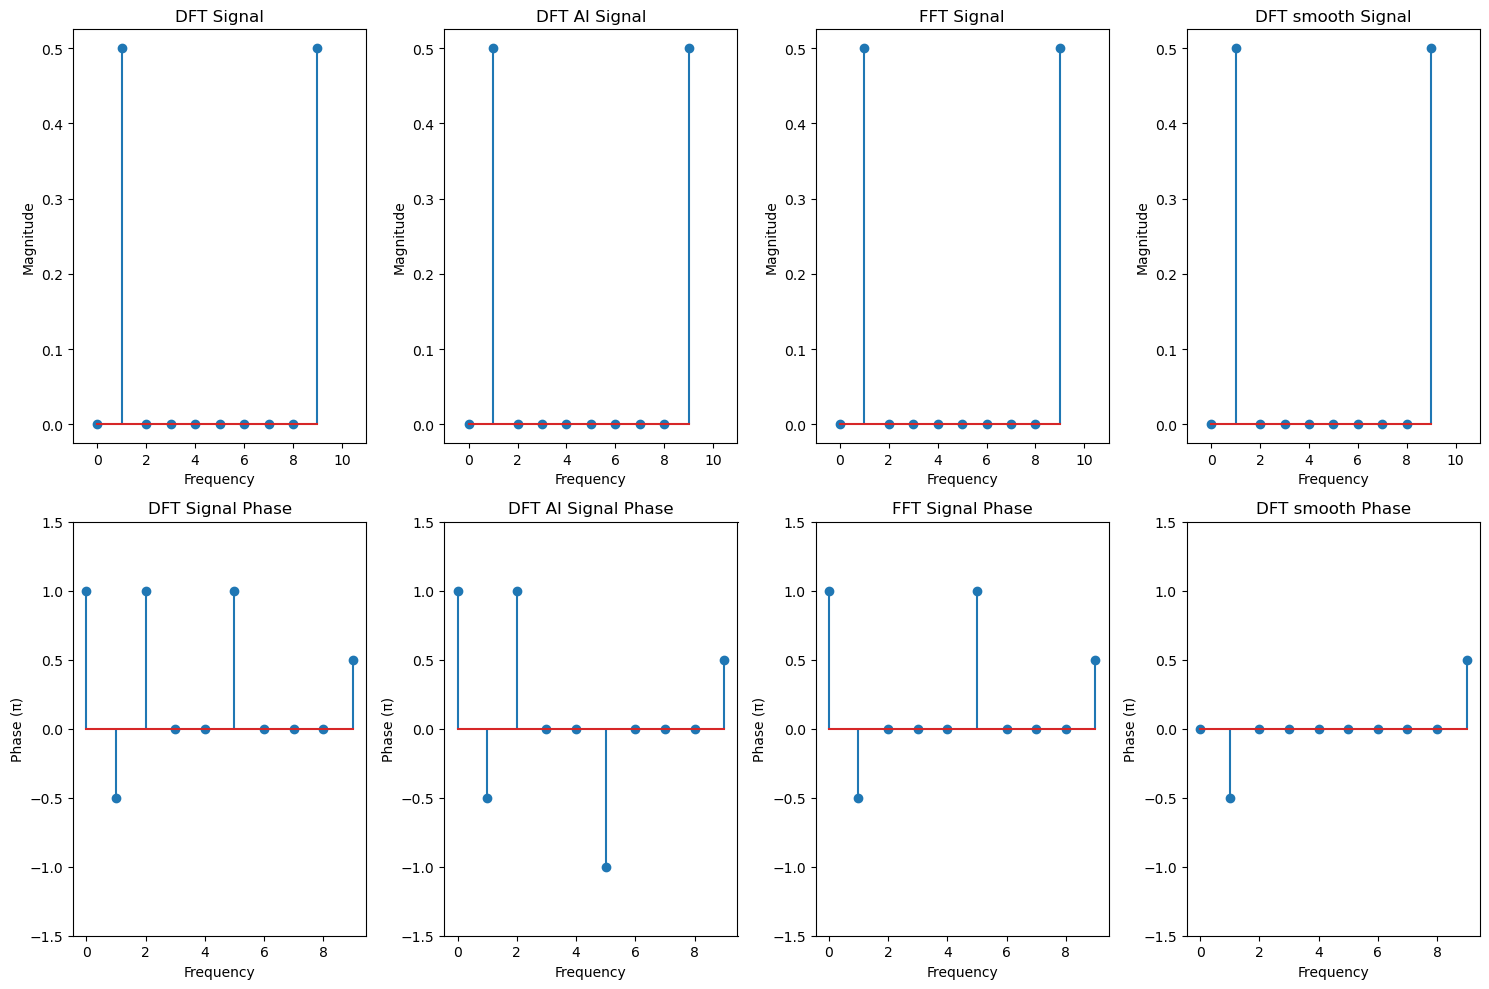

In [2]:
from pds_utils import dft

# Obtengo una señal de 10 muestras con una frecuencia de muestreo de 10 Hz
# y una frecuencia de 1 Hz
(_, signal) = sine.wave(
    sampling_freq=10, samples=10, amplitude=1, dc_level=0, frequency=1
)

X_fft = np.fft.fft(signal)
X_dft_ai = dft.dft_ai(signal)
X_dft = dft.dft(signal)

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
X_fft = np.round(X_fft, decimals=5)
X_dft = np.round(X_dft, decimals=5)
X_dft_ai = np.round(X_dft_ai, decimals=5)

X_smooth = X_dft.copy()
X_smooth[X_smooth == 0 + -0j] = 0 + 0j

print(X_dft)
print(X_fft)

# DFT
axs[0, 0].stem(np.abs(X_dft) / len(signal))
axs[0, 0].set_xlabel("Frequency")
axs[0, 0].set_ylabel("Magnitude")
axs[0, 0].set_title("DFT Signal")
axs[0, 0].set_xlim([-1, len(signal) + 1])

# DFT AI
axs[0, 1].stem(np.abs(X_dft_ai) / len(signal))
axs[0, 1].set_xlabel("Frequency")
axs[0, 1].set_ylabel("Magnitude")
axs[0, 1].set_title("DFT AI Signal")
axs[0, 1].set_xlim([-1, len(signal) + 1])

# FFT
axs[0, 2].stem(np.abs(X_fft) / len(signal))
axs[0, 2].set_xlabel("Frequency")
axs[0, 2].set_ylabel("Magnitude")
axs[0, 2].set_title("FFT Signal")
axs[0, 2].set_xlim([-1, len(signal) + 1])

# DFT Smooth
axs[0, 3].stem(np.abs(X_smooth) / len(signal))
axs[0, 3].set_xlabel("Frequency")
axs[0, 3].set_ylabel("Magnitude")
axs[0, 3].set_title("DFT smooth Signal")
axs[0, 3].set_xlim([-1, len(signal) + 1])

# DFT Phase
axs[1, 0].stem(np.angle(X_dft) / np.pi)
axs[1, 0].set_xlabel("Frequency")
axs[1, 0].set_ylabel("Phase (π)")
axs[1, 0].set_title("DFT Signal Phase")
axs[1, 0].set_ylim([-1.5, 1.5])

# DFT AI Phase
axs[1, 1].stem(np.angle(X_dft_ai) / np.pi)
axs[1, 1].set_xlabel("Frequency")
axs[1, 1].set_ylabel("Phase (π)")
axs[1, 1].set_title("DFT AI Signal Phase")
axs[1, 1].set_ylim([-1.5, 1.5])

# FFT Phase
axs[1, 2].stem(np.angle(X_fft) / np.pi)
axs[1, 2].set_xlabel("Frequency")
axs[1, 2].set_ylabel("Phase (π)")
axs[1, 2].set_title("FFT Signal Phase")
axs[1, 2].set_ylim([-1.5, 1.5])

# DFT Smooth Phase
axs[1, 3].stem(np.angle(X_smooth) / np.pi)
axs[1, 3].set_xlabel("Frequency")
axs[1, 3].set_ylabel("Phase (π)")
axs[1, 3].set_title("DFT smooth Phase")
axs[1, 3].set_ylim([-1.5, 1.5])

plt.tight_layout()
plt.show()

El gráfico del módulo se escaló teniendo en cuenta la cantidad de muestras.

También se printea en pantalla la secuencia de la DFT redondeada a 5 cifras decimales con la función `np.round` y se obtiene:

```
[-0.+0.j  0.-5.j -0.+0.j  0.-0.j  0.+0.j -0.+0.j  0.+0.j  0.-0.j  0.+0.j -0.+5.j]
[-0.+0.j -0.-5.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j  0.-0.j  0.+0.j  0.-0.j -0.+5.j]
```

Se puede apreciar que, debido a la imprecisión de los cálculos, algunos `0`s quedan con signo negativo, afectando el gráfico de la fase.

Para solucionar el problema, se cambian todos los `0`s complejos negativos a positivos con la siguiente expresión: `X_smooth[X_smooth == 0+-0j] = 0+0j`, para sólo graficar la fase de los valores deseados (gráfico `DFT smooth`).

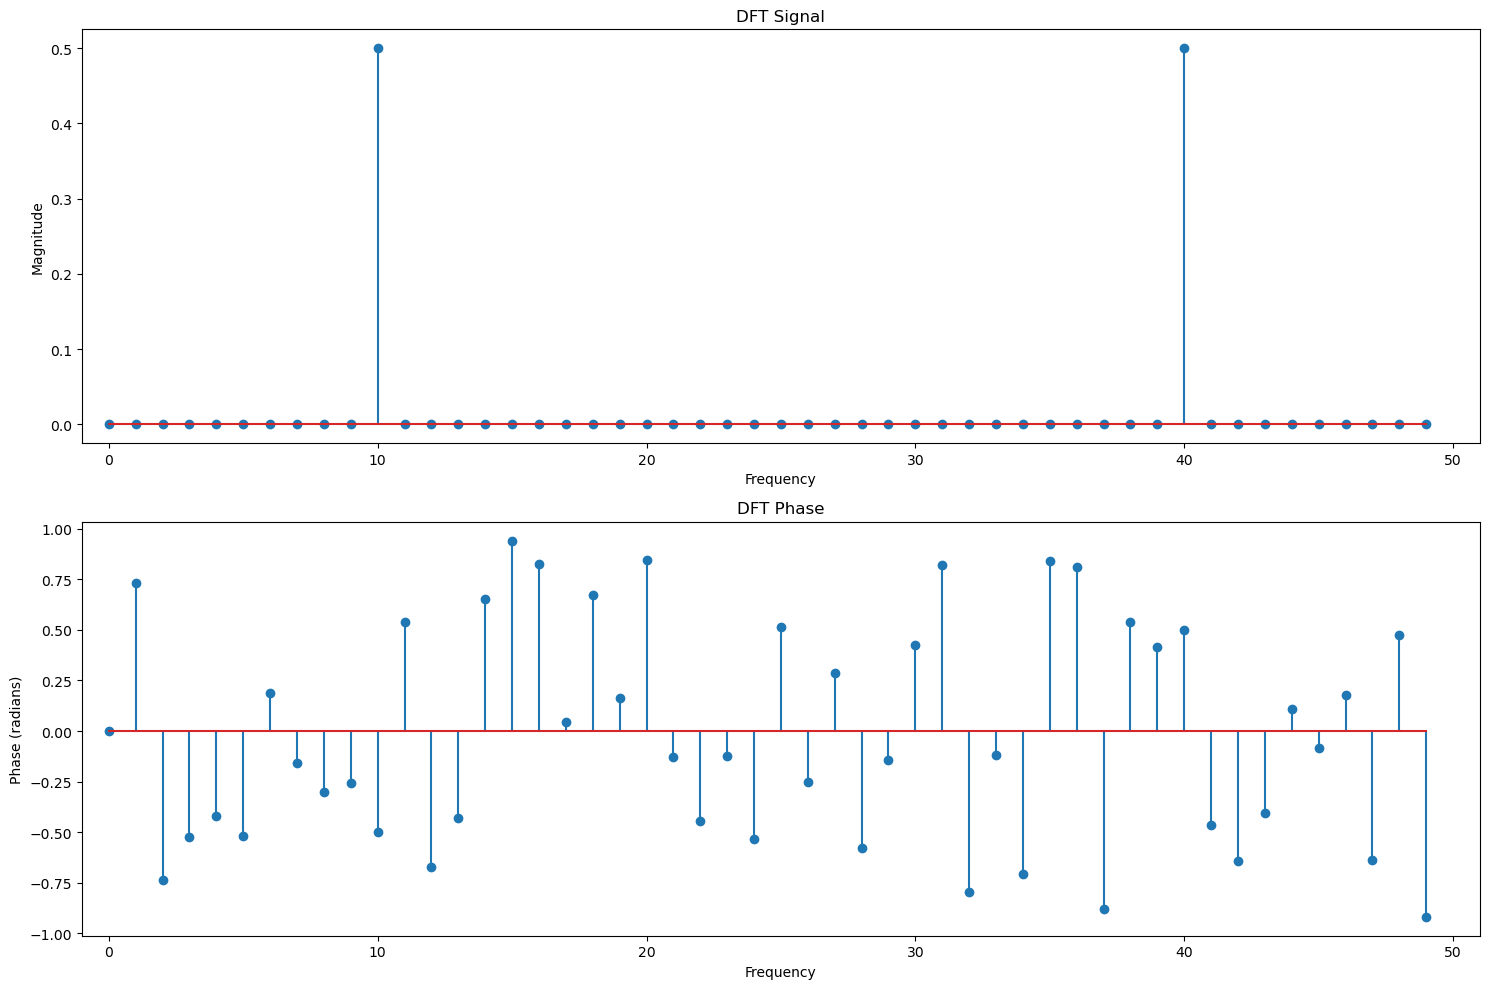

In [3]:
# @title: Gráficos con más muestras

(_, signal) = sine.wave(
    sampling_freq=50, samples=50, amplitude=1, dc_level=0, frequency=10
)

X_dft = dft.dft(signal)
dft.plot_dft(X_dft)

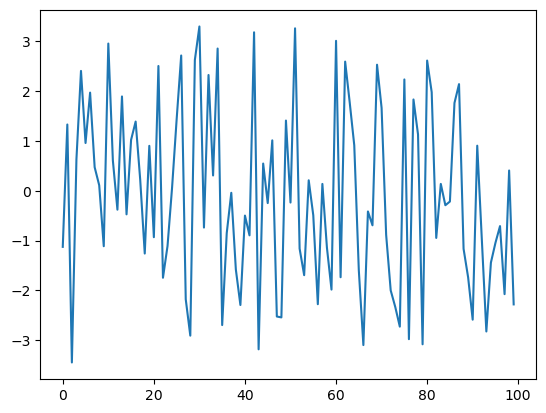

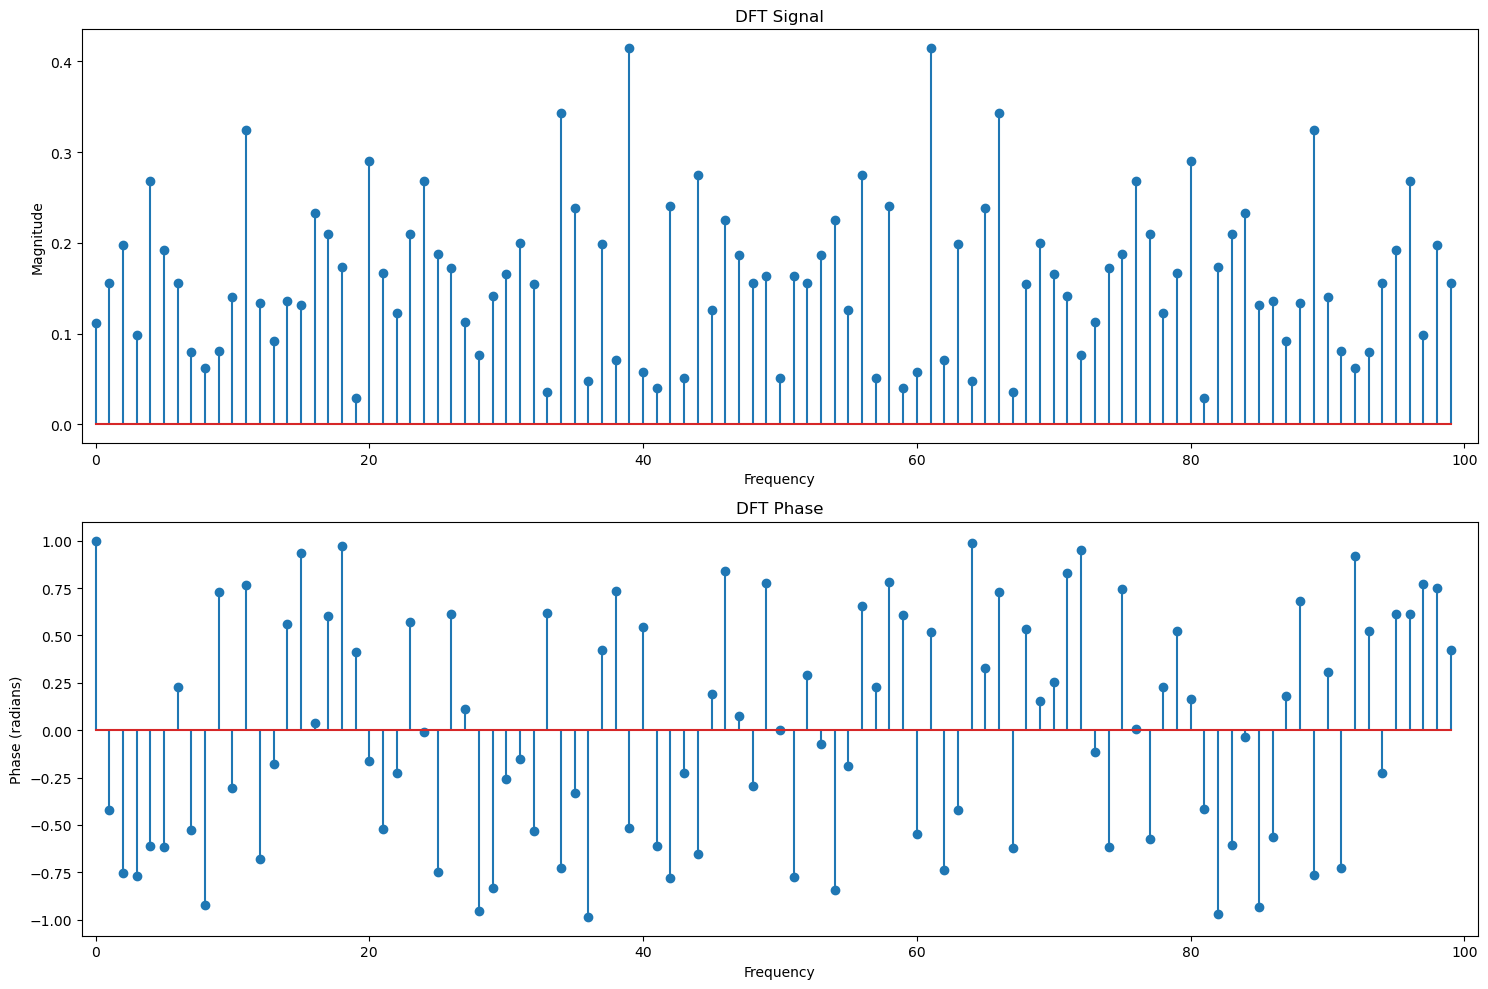

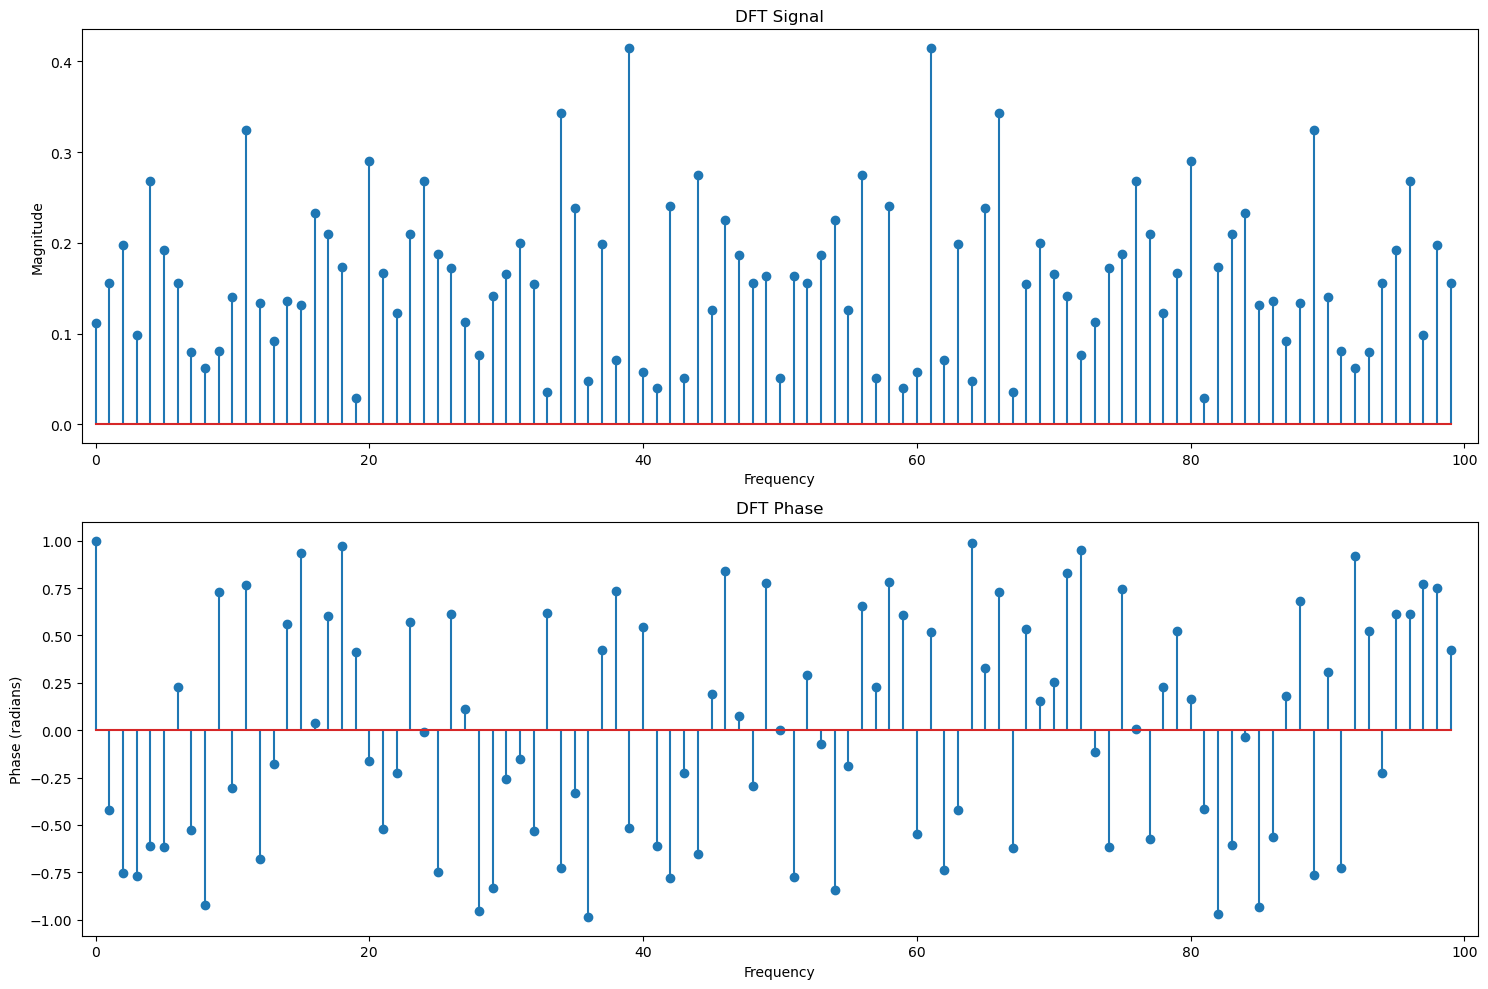

In [4]:
# @title: DFT de una señal random uniforme

# (b-a)^2 / 12 = variance
variance = 4
# b-a = sqrt(variance * 12)
x = np.sqrt(variance * 12)
# center = (a+b)/2 = 0
b = x / 2
a = -b

noise = np.random.uniform(a, b, 100)

plt.plot(noise)
plt.show()

# Usando algoritmo propio
dft.plot_dft(dft.dft(noise))
# Usando numpy y la fft
dft.plot_dft(np.fft.fft(noise))